In [1]:
%pip install pandas matplotlib seaborn plotly dash scikit-learn joblib
import pandas as pd
from pptx import Presentation
from pptx.util import Inches, Pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import dash
from dash import dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import re

from io import BytesIO
import base64
import plotly.io as pio

Note: you may need to restart the kernel to use updated packages.


In [2]:
accidents = pd.read_csv("cleaned_data/accidents.csv")

#### Dropping Extra Columns

In [3]:
# accidents = accidents.drop(columns=['occupation_category_code'])

In [4]:
accidents['worker_age'].fillna(0).astype(int)

0        58
1        29
2        30
3        64
4        74
         ..
15426    51
15427    57
15428    60
15429    42
15430    68
Name: worker_age, Length: 15431, dtype: int64

In [5]:
# from pptx.util import Inches, Pt
df = accidents.describe(include='all').T.fillna('')#.to_string(index=False)


df = df.reset_index()

# PowerPoint presentation
prs = Presentation()
slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(slide_layout)

# Table
rows, cols = df.shape[0] + 1, df.shape[1]  # +1 for header row
left = Inches(0.5)
top = Inches(0.5)
width = Inches(12)
height = Inches(0.4 * rows)

table = slide.shapes.add_table(rows, cols, left, top, width, height).table

# headers
for col_index, col_name in enumerate(df.columns):
    cell = table.cell(0, col_index)
    cell.text = str(col_name)
    cell.text_frame.paragraphs[0].font.size = Pt(10)

for row_index, row in df.iterrows():
    for col_index, value in enumerate(row):
        cell = table.cell(row_index + 1, col_index)
        if pd.isna(value):
            value = ""
        cell.text = str(value)
        cell.text_frame.paragraphs[0].font.size = Pt(10)

prs.save('report/dataset2/dataset2_description.pptx')


/var/folders/wn/wdlhry7x1m75kh1md7t0x5p00000gn/T/ipykernel_31676/3401559254.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = accidents.describe(include='all').T.fillna('')#.to_string(index=False)


# Reports

In [6]:
path = "report/dataset2/"

### Worker Age Analysis & Report

In [8]:
accidents

,date,worker_age,occupation_category_code,occupation_category_description,NOC,occupation_description,worker_experience_in_years,accident_source_category_description1,source_category_description2,accident_category_description,accident_place_description,city,organization_province_code,industry_sector_description
0,2023-10-14,58.0,72,FACILITY OPERATION AND MAINTENANCE MANAGERS,722.0,facility operation managers,0.5,FLOORS,UNKNOWN,FALL ON SAME LEVEL,PLACE NOT SPECIFIED,markham,ON,transportation
1,2023-11-04,29.0,732,MOTOR VEHICLE MECHANICS,7322.0,"motor vehicle mechanics, technicians and mecha...",0.5,TRUCK,"VEHICLE & MOBILE EQUIP. PARTS, N.E.C.",CAUGHT IN OR COMPRESSED BY EQUIP./OBJECTS,FARM.,winnipeg,MB,industrial
2,2023-12-17,30.0,745,LONGSHORE WORKERS AND MATERIAL HANDLERS,7453.0,material handlers,0.5,"PLANT & INDUSTRIAL POWERED VEHICLE, N.E.C.","BODILY MOTION OR POSITION OF INJURED, ILL WORKER",STRUCK BY OBJECT,"RESIDENTIAL INSTITUTION. (HOSPITALS, ORPHANAGE...",harriston,ON,industrial
3,2023-11-13,64.0,961,"LABOURERS IN PROCESSING, MANUFACTURING AND UTI...",9613.0,labourers in metal fabrication,0.5,PARKING LOTS,WEATHER AND ATMOSPHERIC CONDITIONS,FALL ON SAME LEVEL,PLACE FOR SPORTS AND RECREATION.,markham,ON,manufacturing
4,2023-11-13,74.0,741,MOTOR VEHICLE AND TRANSIT DRIVERS,7412.0,truck drivers,0.5,OTHER STRUCTURES,WEATHER AND ATMOSPHERIC CONDITIONS,FALL ON SAME LEVEL,PUBLIC BUILDINGS.,newcastle,ON,industrial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15426,2022-11-25,51.0,961,"LABOURERS IN PROCESSING, MANUFACTURING AND UTI...",9619.0,"other labourers in processing, manufacturing a...",0.5,"STAIRS, STEPS","BODILY MOTION OR POSITION OF INJURED, ILL WORKER",FALL TO LOWER LEVEL,HOME.,toronto,ON,construction
15427,2023-07-24,57.0,761,TRADES HELPERS AND LABOURERS,7612.0,construction trades helpers and labourers,0.5,TRACTOR,UNKNOWN,"PEDESTRIAN STRUCK BY VEHICLE, MOBILE EQUIPMENT",INDUSTRIAL SITE.,dunchurch,ON,construction
15428,2023-07-05,60.0,735,STATIONARY ENGINEERS & POWER STATION & SYSTEM...,7353.0,power systems and power station operators,0.5,"BODILY MOTION OR POSITION OF INJURED, ILL WORKER","BODILY MOTION OR POSITION OF INJURED, ILL WORKER",REPETITIVE MOTION,INDUSTRIAL SITE.,ajax,ON,manufacturing
15429,2022-05-05,42.0,341,ASSISTING OCCUPATIONS IN SUPPORT OF HEALTH SER...,3414.0,nurse aides and orderlies,0.5,HEALTH CARE PATIENT OR RESIDENT OF HEALTH CARE...,UNKNOWN,"ASSAULTS, VIOLENT ACTS AND HARASSMENT BY PERSO...",PLACE NOT SPECIFIED,toronto,ON,health_care


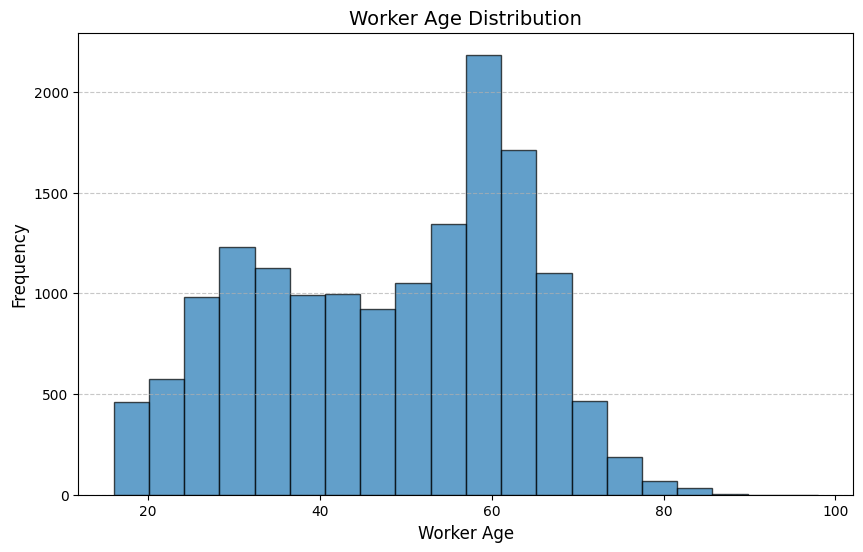

In [10]:
# Plotting
plt.figure(1, figsize=(10, 6))
plt.hist(accidents['worker_age'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Worker Age Distribution', fontsize=14)
plt.xlabel('Worker Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("report/dataset2/worker_age_distribution.png")

plt.figure(2, figsize=(10, 6))
plt.hist(accidents['worker_experience_in_years'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Worker Experience Distribution', fontsize=14)
plt.xlabel('Worker Experience (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("report/dataset2/worker_experience_distribution.png")

plt.close()

# PP
presentation = Presentation()

# Slide 1: Description
slide1 = presentation.slides.add_slide(presentation.slide_layouts[5])
title1 = slide1.shapes.title
title1.text = "Descriptive Analysis"
content1 = slide1.shapes.add_textbox(Inches(1), Inches(1.5), Inches(8), Inches(4))
text_frame1 = content1.text_frame
text_frame1.text = accidents['worker_age'].describe().to_string()
text_frame1.text += "\n\nAs can be seen, there is a datapoint age=198 that is unreasonably big.\nIn the last slide I clean the extraordirany datapoint."

# Slide 2: Histogram
slide2 = presentation.slides.add_slide(presentation.slide_layouts[5])
title2 = slide2.shapes.title
title2.text = "Worker Age Distribution"
slide2.shapes.add_picture("report/dataset2/worker_age_distribution.png", Inches(1), Inches(1.5), Inches(8), Inches(4.5))

# Slide 3: Cleaned Diagram
slide2 = presentation.slides.add_slide(presentation.slide_layouts[5])
title2 = slide2.shapes.title
title2.text = "Worker Age Distribution (Cleaned)"
slide2.shapes.add_picture("report/dataset2/worker_age_distribution_cleaned.png", Inches(1), Inches(1.5), Inches(8), Inches(4.5))

presentation.save("report/dataset2/age_analysis.pptx")

### Occupation based Analysis

In [ ]:
# Top Occupations Bar Chart
top_occupations = accidents['occupation_description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_occupations.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 10 Occupations with the Most Incidents", fontsize=14)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig(path+"top_occupations_bar.png")
plt.close()

# Occupation vs Industry (Clustered Bar Chart)
occupation_industry_data = accidents.groupby(['occupation_description', 'industry_sector_description']).size().unstack(fill_value=0)
top_occupations_industry = occupation_industry_data.loc[top_occupations.index]

plt.figure(figsize=(14, 8))
top_occupations_industry.plot(kind='bar', colormap='plasma', figsize=(14, 8))
plt.title("Industry Distribution for Top 10 Occupations", fontsize=14)
plt.xlabel("Occupation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig(path+"occupation_industry_bar.png")
plt.close()

## Other Analysis

In [ ]:
# Combine categories under 2% into "Others"
def combine_others(series, threshold=0.02):
    total = series.sum()
    series_perc = series / total
    combined = series.copy()
    combined[series_perc < threshold] = 0
    combined['Others Categories With Individual Percentages < 2.0%'] = series[series_perc < threshold].sum()
    return combined.sort_values(ascending=False)

# 1. Accident Categories Bar Chart
accident_category_counts = accidents['accident_category_description'].value_counts()
# accident_category_combined = combine_others(accident_category_counts)
plt.figure(figsize=(12, 6))
accident_category_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Accident Categories Frequency", fontsize=14)
plt.xlabel("Accident Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig(path+"accident_category_bar_with_others.png")
plt.close()

# 2. Industry Bar Chart
industry_counts = accidents['industry_sector_description'].value_counts()
industry_combined = combine_others(industry_counts)
plt.figure(figsize=(12, 6))
industry_combined.plot(kind='bar', color='purple', alpha=0.7)
plt.title("Incidents by Industry Sector (with 'Others')", fontsize=14)
plt.xlabel("Industry Sector", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.savefig(path+"industry_bar_with_others.png")
plt.close()

# 3. Worker Experience vs Accidents Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=accidents, x='worker_experience_in_years', y='accident_category_description',
    alpha=0.6, color='teal'
)
plt.title("Worker Experience vs Accident Categories", fontsize=14)
plt.xlabel("Worker Experience (Years)", fontsize=12)
plt.ylabel("Accident Categories", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(path + "experience_vs_accidents_with_others.png")
plt.close()

#### Accident Source Proportion (Pie Chart)

In [ ]:
accident_source_counts = accidents['accident_source_category_description1'].value_counts()
accident_source_combined = combine_others(accident_source_counts)
accident_source_combined = accident_source_combined.rename({'Others Categories With Individual Percentages < 2.0%': 'Others Categories With\nIndividual\nPercentages < 2.0%'})
plt.figure(figsize=(14, 12), dpi=300)
accident_source_combined.plot.pie(
    autopct=lambda p: f'{p:.1f}' if p>0 else '', #'%1.1f%%',
    startangle=140, colors=sns.color_palette("pastel")
)
plt.title("Accident Sources Proportion", fontsize=14)
plt.savefig(path+"accident_source_pie_with_others2.png")
plt.close()

### Geographic Trends

In [ ]:
population = pd.read_csv("data/suplemantary/table-data.csv")
population = population.rename(columns={'name':'city', 'pop2023':'population'})
population23 = population[['city', 'population']]
population23['city'] = population23['city'].str.strip().str.lower()

In [ ]:
combined_geographic_data = (accidents.groupby(['organization_province_code', 'city']).size().reset_index(name='Accident_Count').sort_values(by='Accident_Count', ascending=False))

# Selecting top cities across provinces for clarity
top_combined_data = combined_geographic_data.head(20)
with_population = pd.merge(top_combined_data, population23, how='left', on=['city'])
with_population.dropna(inplace=True)
with_population['Accident_Score'] = with_population['Accident_Count']/with_population['population']*100
with_population = with_population.sort_values(by='Accident_Score', ascending=False)

In [ ]:
# Plotting a bar chart for top cities and provinces
plt.figure(figsize=(14, 8))
for province in top_combined_data['organization_province_code'].unique():
    subset = top_combined_data[top_combined_data['organization_province_code'] == province]
    plt.bar(
        subset['city'] + f" ({province})",
        subset['Accident_Count'],
        label=f"Province: {province}",
        alpha=0.7
    )
plt.title("Top Cities with Workplace Accidents by Province", fontsize=16)
plt.xlabel("City (Province)", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(path+"combined_geographic_bar.png")
plt.close()

# Plotting a bar chart for top cities and provinces
plt.figure(figsize=(14, 8))
for province in with_population['organization_province_code'].unique():
    subset = with_population[with_population['organization_province_code'] == province]
    plt.bar(
        subset['city'] + f" ({province})",
        subset['Accident_Count']/subset['population']*100,
        label=f"Province: {province}",
        alpha=0.7
    )
plt.title("Top Cities with Workplace Accidents", fontsize=16)
plt.xlabel("City (Province)", fontsize=12)
plt.ylabel("Accident Count Score (count/population)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(path+"combined_geographic_bar_with_population.png")
plt.close()

### Temporal Trends

In [ ]:
accidents['date'] = pd.to_datetime(accidents['date'], errors='coerce')

accidents['Year-Month'] = accidents['date'].dt.to_period('M')
accidents['Year-Month']

In [ ]:
accidents['date'] = pd.to_datetime(accidents['date'], errors='coerce')

accidents['Year-Month'] = accidents['date'].dt.to_period('M')
monthly_trends = accidents.groupby('Year-Month').size()

# Time-series trend of workplace accidents
plt.figure(figsize=(14, 6))
monthly_trends.plot(marker='o', linestyle='-', color='red', alpha=0.7)
plt.title("Monthly Trends in Workplace Accidents", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Accident Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.savefig(path + "temporal_trends_workplace_accidents.png")
plt.close()

### Interactive Dashboard

In [ ]:
accidents['date'] = pd.to_datetime(accidents['date'], errors='coerce')
accidents['Year-Month'] = accidents['date'].dt.to_period('M').astype(str)

unique_industries = accidents['industry_sector_description'].dropna().unique()
unique_accident_categories = accidents['accident_category_description'].dropna().unique()

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Workplace Accident Analysis Dashboard", style={'textAlign': 'center'}),
    html.Label("Select Industry:"),
    dcc.Dropdown(
        id='industry-dropdown',
        options=[{'label': i, 'value': i} for i in unique_industries],
        multi=True
    ),
    html.Label("Select Accident Category:"),
    dcc.Dropdown(
        id='accident-dropdown',
        options=[{'label': i, 'value': i} for i in unique_accident_categories],
        multi=True
    ),
    dcc.Graph(id='accident-trends-graph'),
    dcc.Graph(id='accident-source-bar'),
    html.Button("Export to PowerPoint", id='export-button', n_clicks=0),
    dcc.Download(id="download-ppt")
], style={'width': '48%', 'display': 'inline-block'})

@app.callback(
    [Output('accident-trends-graph', 'figure'),
     Output('accident-source-bar', 'figure')],
    [Input('industry-dropdown', 'value'),
     Input('accident-dropdown', 'value')]
)
def update_graphs(selected_industries, selected_accidents):
    filtered_data = accidents.copy()
    if selected_industries:
        filtered_data = filtered_data[filtered_data['industry_sector_description'].isin(selected_industries)]
    if selected_accidents:
        filtered_data = filtered_data[filtered_data['accident_category_description'].isin(selected_accidents)]

    accident_trends_filtered = filtered_data.groupby('Year-Month').size().reset_index(name='Accident Count')
    fig1 = px.line(accident_trends_filtered, x='Year-Month', y='Accident Count', title='Monthly Workplace Accident Trends', markers=True)

    accident_sources_filtered = filtered_data['accident_source_category_description1'].value_counts().reset_index()
    accident_sources_filtered.columns = ['Accident Source', 'Count']
    fig2 = px.bar(accident_sources_filtered, x='Accident Source', y='Count', title='Accident Sources Distribution', text_auto=True)

    return fig1, fig2

@app.callback(
    # Output("download-ppt", "data"),
    [Input("export-button", "n_clicks"),
     Input('accident-trends-graph', 'figure'),
     Input('accident-source-bar', 'figure')]
)
def export_to_ppt(n_clicks, fig1, fig2):
    if n_clicks > 0:
        ppt = Presentation()
        slide_layout = ppt.slide_layouts[5]

        # slide with trends graph
        slide = ppt.slides.add_slide(slide_layout)
        slide.shapes.title.text = "Monthly Workplace Accident Trends"
        image_stream = BytesIO()
        pio.write_image(fig1, image_stream, format='png')
        image_stream.seek(0)
        slide.shapes.add_picture(image_stream, Inches(1), Inches(1), Inches(7), Inches(5))

        # slide with sources bar graph
        slide = ppt.slides.add_slide(slide_layout)
        slide.shapes.title.text = "Accident Sources Distribution"
        image_stream = BytesIO()
        pio.write_image(fig2, image_stream, format='png')
        image_stream.seek(0)
        slide.shapes.add_picture(image_stream, Inches(1), Inches(1), Inches(7), Inches(5))

        ppt_file = path+"interactive_plt.pptx"#BytesIO()
        ppt.save(ppt_file)
        print("Your powerpoint slides saved in", ppt_file)
        # ppt_file.seek(0)
        # temp = send_file(ppt_file, download_name="Accident_Report.pptx", as_attachment=True)
        # print('***')
        # print(ppt_file)

        # return send_file(ppt_file, download_name="Accident_Report.pptx", as_attachment=True)

if __name__ == '__main__':
    app.run_server(debug=True)
